#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings in output
import warnings
warnings.filterwarnings('ignore')

# Read Data


In [ ]:
data = pd.read_csv("ANUBHAV JHA - used_cars_data.csv")

In [ ]:
data.head() # gives top 5

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
data.tail() # give last 5

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [ ]:
data.info() # give null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [ ]:
data.nunique() # helps with duplication

,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150


In [ ]:
data.isnull().sum() # get column wise null count

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [ ]:
(data.isnull().sum()/(len(data)))*100 # convert to %age

,0
S.No.,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.027575
Engine,0.634220


# Data Reduction

In [ ]:
# remove null rows from power column
data.dropna(axis=0, subset=['Power'], inplace=True)
data.dropna(axis=0, subset=['Mileage'], inplace=True)
data.dropna(axis=0, subset=['Engine'], inplace=True)

data.isnull().sum() # number of missing values in each column

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [ ]:
# converting columns such as Mileage, Engine , Power, New_Price inplace=True means it will change the original data
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '')
data['Mileage'] = data['Mileage'].str.replace(' km/kg', '')
data['Engine'] = data['Engine'].str.replace(' CC', '')
data['Power'] = data['Power'].str.replace(' bhp', '')
data['New_Price'] = data['New_Price'].str.replace(' Lakh', '')


# converting columns such as Mileage, Engine , Power, New_Price to float
columns_to_convert = ['Mileage', 'Engine', 'Power', 'Price']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')



In [ ]:
# Remove S.No. column from data
data = data.drop(['S.No.'], axis = 1)
data.info() # check to see

<class 'pandas.core.frame.DataFrame'>
Index: 7205 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7205 non-null   object 
 1   Location           7205 non-null   object 
 2   Year               7205 non-null   int64  
 3   Kilometers_Driven  7205 non-null   int64  
 4   Fuel_Type          7205 non-null   object 
 5   Transmission       7205 non-null   object 
 6   Owner_Type         7205 non-null   object 
 7   Mileage            7205 non-null   float64
 8   Engine             7205 non-null   int64  
 9   Power              7076 non-null   float64
 10  Seats              7198 non-null   float64
 11  New_Price          1005 non-null   object 
 12  Price              5981 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 788.0+ KB


# Creating Features

In [ ]:
from datetime import date

data['Car_Age']= (date.today().year) - data['Year']

data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,NaN,1.75,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,NaN,12.50,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61,4.50,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,NaN,17.74,12


In [ ]:
data['Brand'] = data.Name.str.split().str.get(0) # the first part of name is brand

In [ ]:
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2) # the rest 2 will be model in most cases

In [ ]:
data[['Name','Brand','Model']] # see the new columns

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [ ]:
print(data.Brand.unique()) # now we clean if any duplication
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [ ]:
# replace the incorrect names with correct ones
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

# EDA Exploratory Data Analysis

## Statistics Summary


In [ ]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Car_Age
count,7205.000000,7.205000e+03,7205.000000,7205.000000,7076.000000,7198.000000,5981.000000,7205.000000
mean,2013.388758,5.863672e+04,18.178300,1616.762665,112.780976,5.279800,9.495133,11.611242
std,3.237501,8.466067e+04,4.513001,595.085712,53.492219,0.811759,11.202164,3.237501
min,1996.000000,1.710000e+02,0.000000,624.000000,34.200000,0.000000,0.440000,6.000000
25%,2011.000000,3.400000e+04,15.200000,1198.000000,75.000000,5.000000,3.500000,9.000000
50%,2014.000000,5.328000e+04,18.190000,1493.000000,94.340000,5.000000,5.650000,11.000000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,9.950000,14.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000,29.000000


In [ ]:
data.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
count,7205,7205,7205.000000,7.205000e+03,7205,7205,7205,7205.000000,7205.000000,7076.000000,7198.000000,1005,5981.000000,7205.000000,7205,7204
unique,2019,11,NaN,NaN,4,2,4,NaN,NaN,NaN,NaN,625,NaN,NaN,32,718
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,95.13,NaN,NaN,Maruti,SwiftDzire
freq,55,944,NaN,NaN,3840,5169,5924,NaN,NaN,NaN,NaN,6,NaN,NaN,1431,189
mean,NaN,NaN,2013.388758,5.863672e+04,NaN,NaN,NaN,18.178300,1616.762665,112.780976,5.279800,NaN,9.495133,11.611242,NaN,NaN
std,NaN,NaN,3.237501,8.466067e+04,NaN,NaN,NaN,4.513001,595.085712,53.492219,0.811759,NaN,11.202164,3.237501,NaN,NaN
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,0.000000,624.000000,34.200000,0.000000,NaN,0.440000,6.000000,NaN,NaN
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.200000,1198.000000,75.000000,5.000000,NaN,3.500000,9.000000,NaN,NaN
50%,NaN,NaN,2014.000000,5.328000e+04,NaN,NaN,NaN,18.190000,1493.000000,94.340000,5.000000,NaN,5.650000,11.000000,NaN,NaN
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1968.000000,138.100000,5.000000,NaN,9.950000,14.000000,NaN,NaN


In [ ]:
# make list of different columns based on numeric and non numeric

cat_cols=cat_cols = data.columns[data.dtypes == 'object']

num_cols = num_cols = data.columns[data.dtypes != 'object'].tolist()


print(f"Categorical Variables: {cat_cols}")

print(f"Numerical Variables: {num_cols}")


Categorical Variables: Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'New_Price', 'Brand', 'Model'],
      dtype='object')
Numerical Variables: ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Car_Age']


In [ ]:
# Dropping the specified columns permanently
data.drop(columns=['New_Price', 'Model', 'Name'], inplace=True)


# Verify the remaining columns
print(data.columns)


Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Car_Age',
       'Brand'],
      dtype='object')


# EDA Univariate Analysis

Year
Skew : -0.84


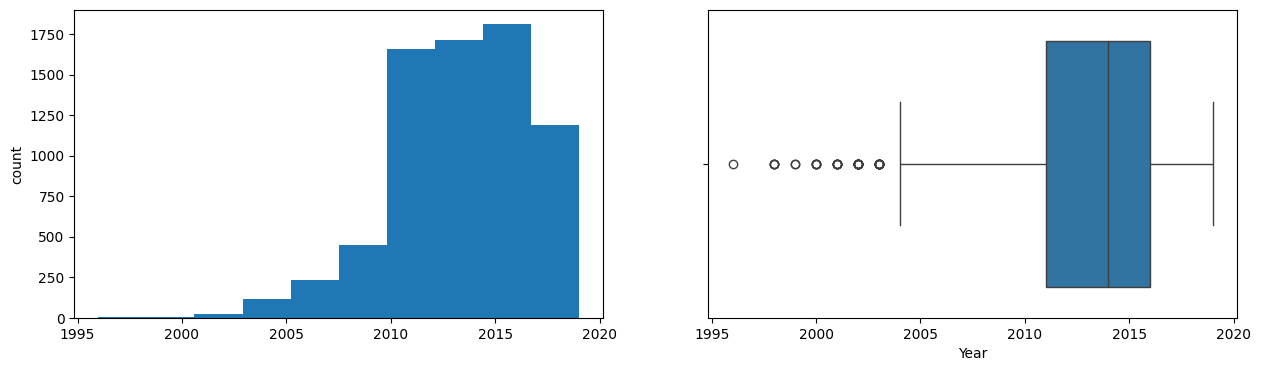

Kilometers_Driven
Skew : 61.48


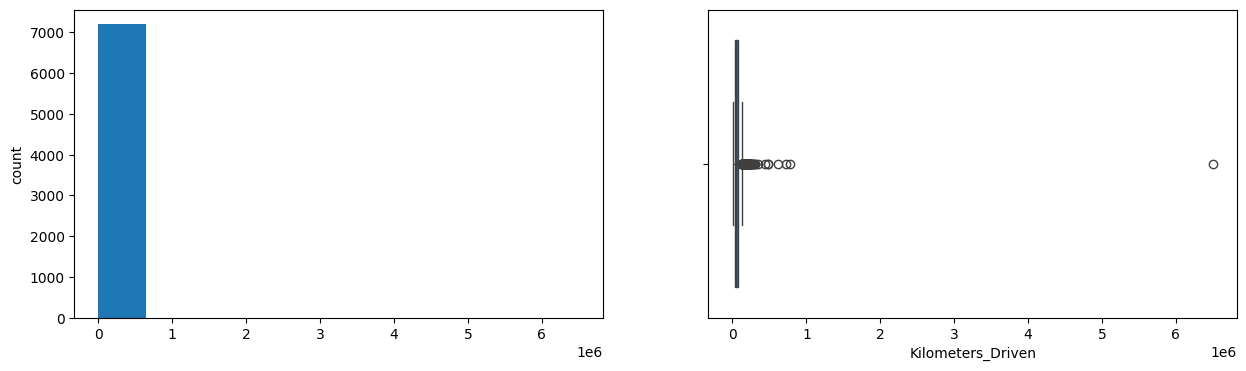

Mileage
Skew : -0.37


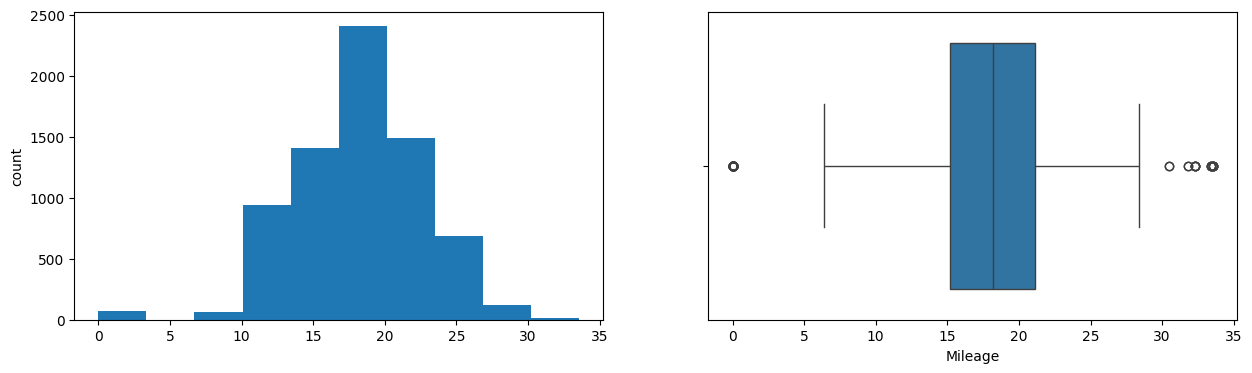

Engine
Skew : 1.42


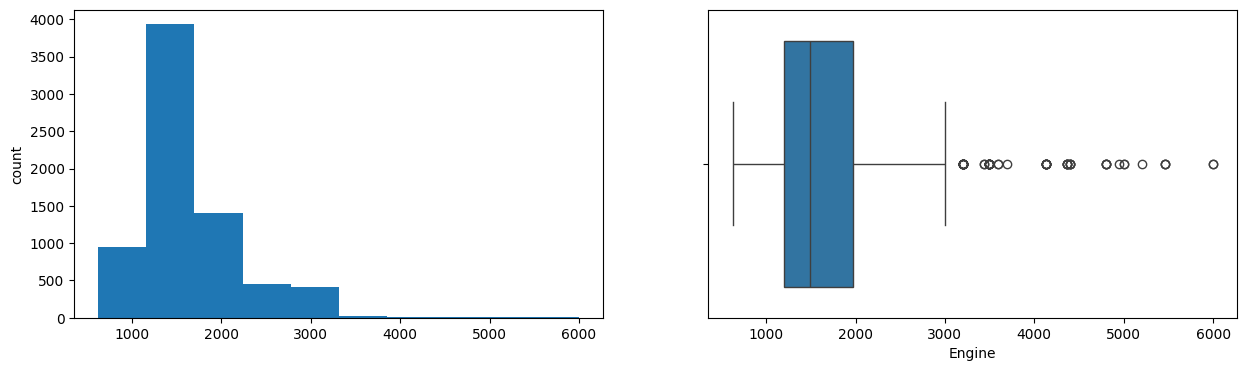

Power
Skew : 1.96


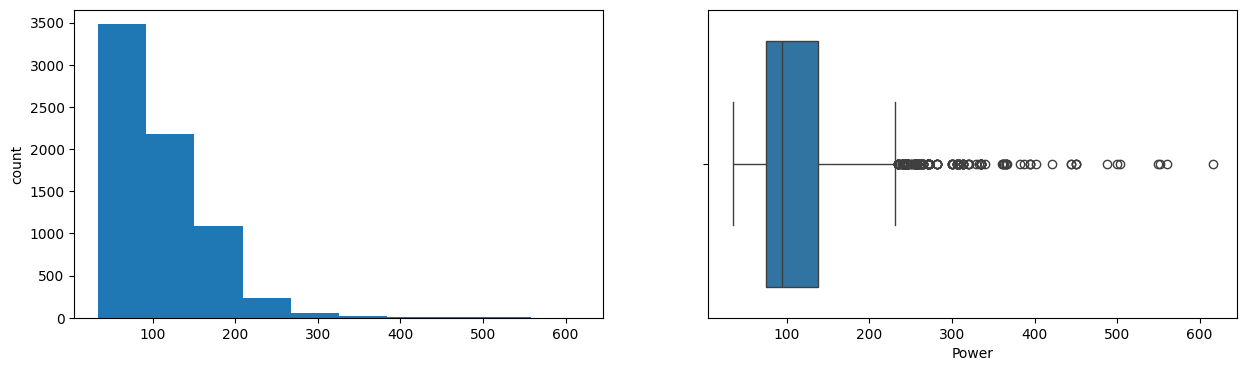

Seats
Skew : 1.9


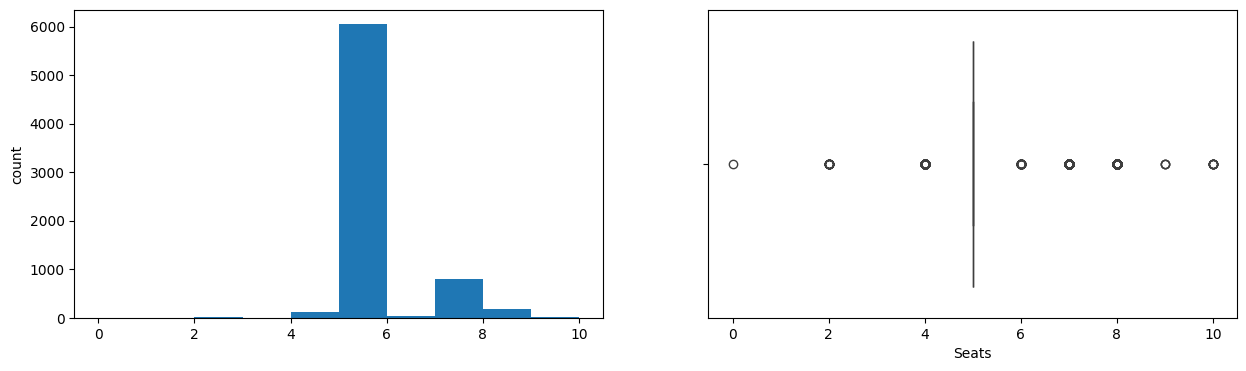

Price
Skew : 3.34


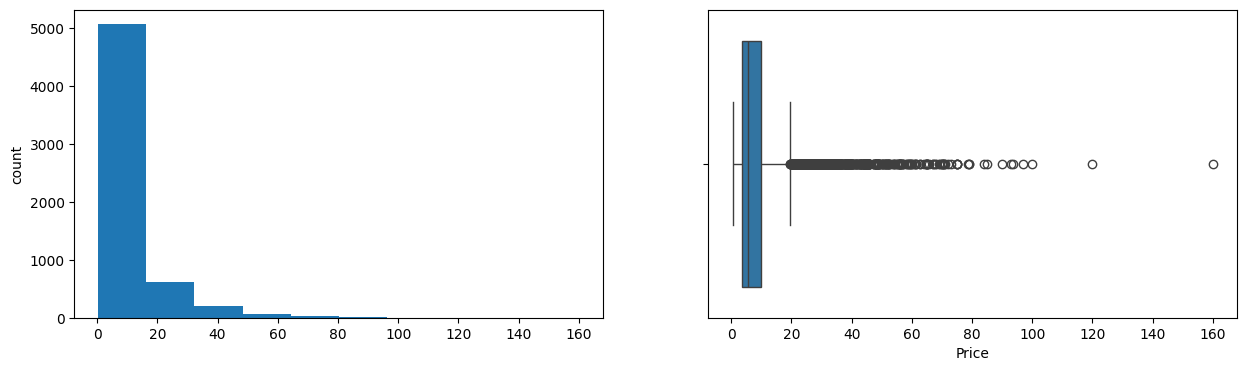

Car_Age
Skew : 0.84


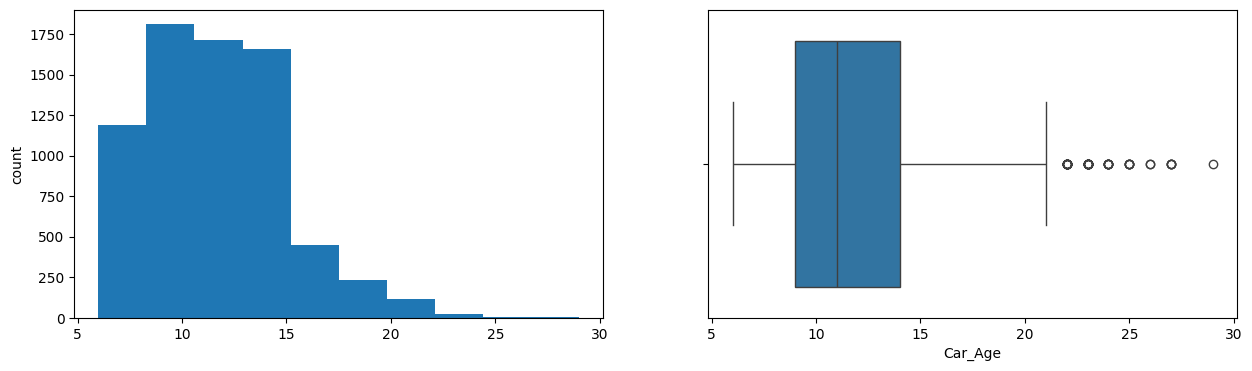

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15,4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

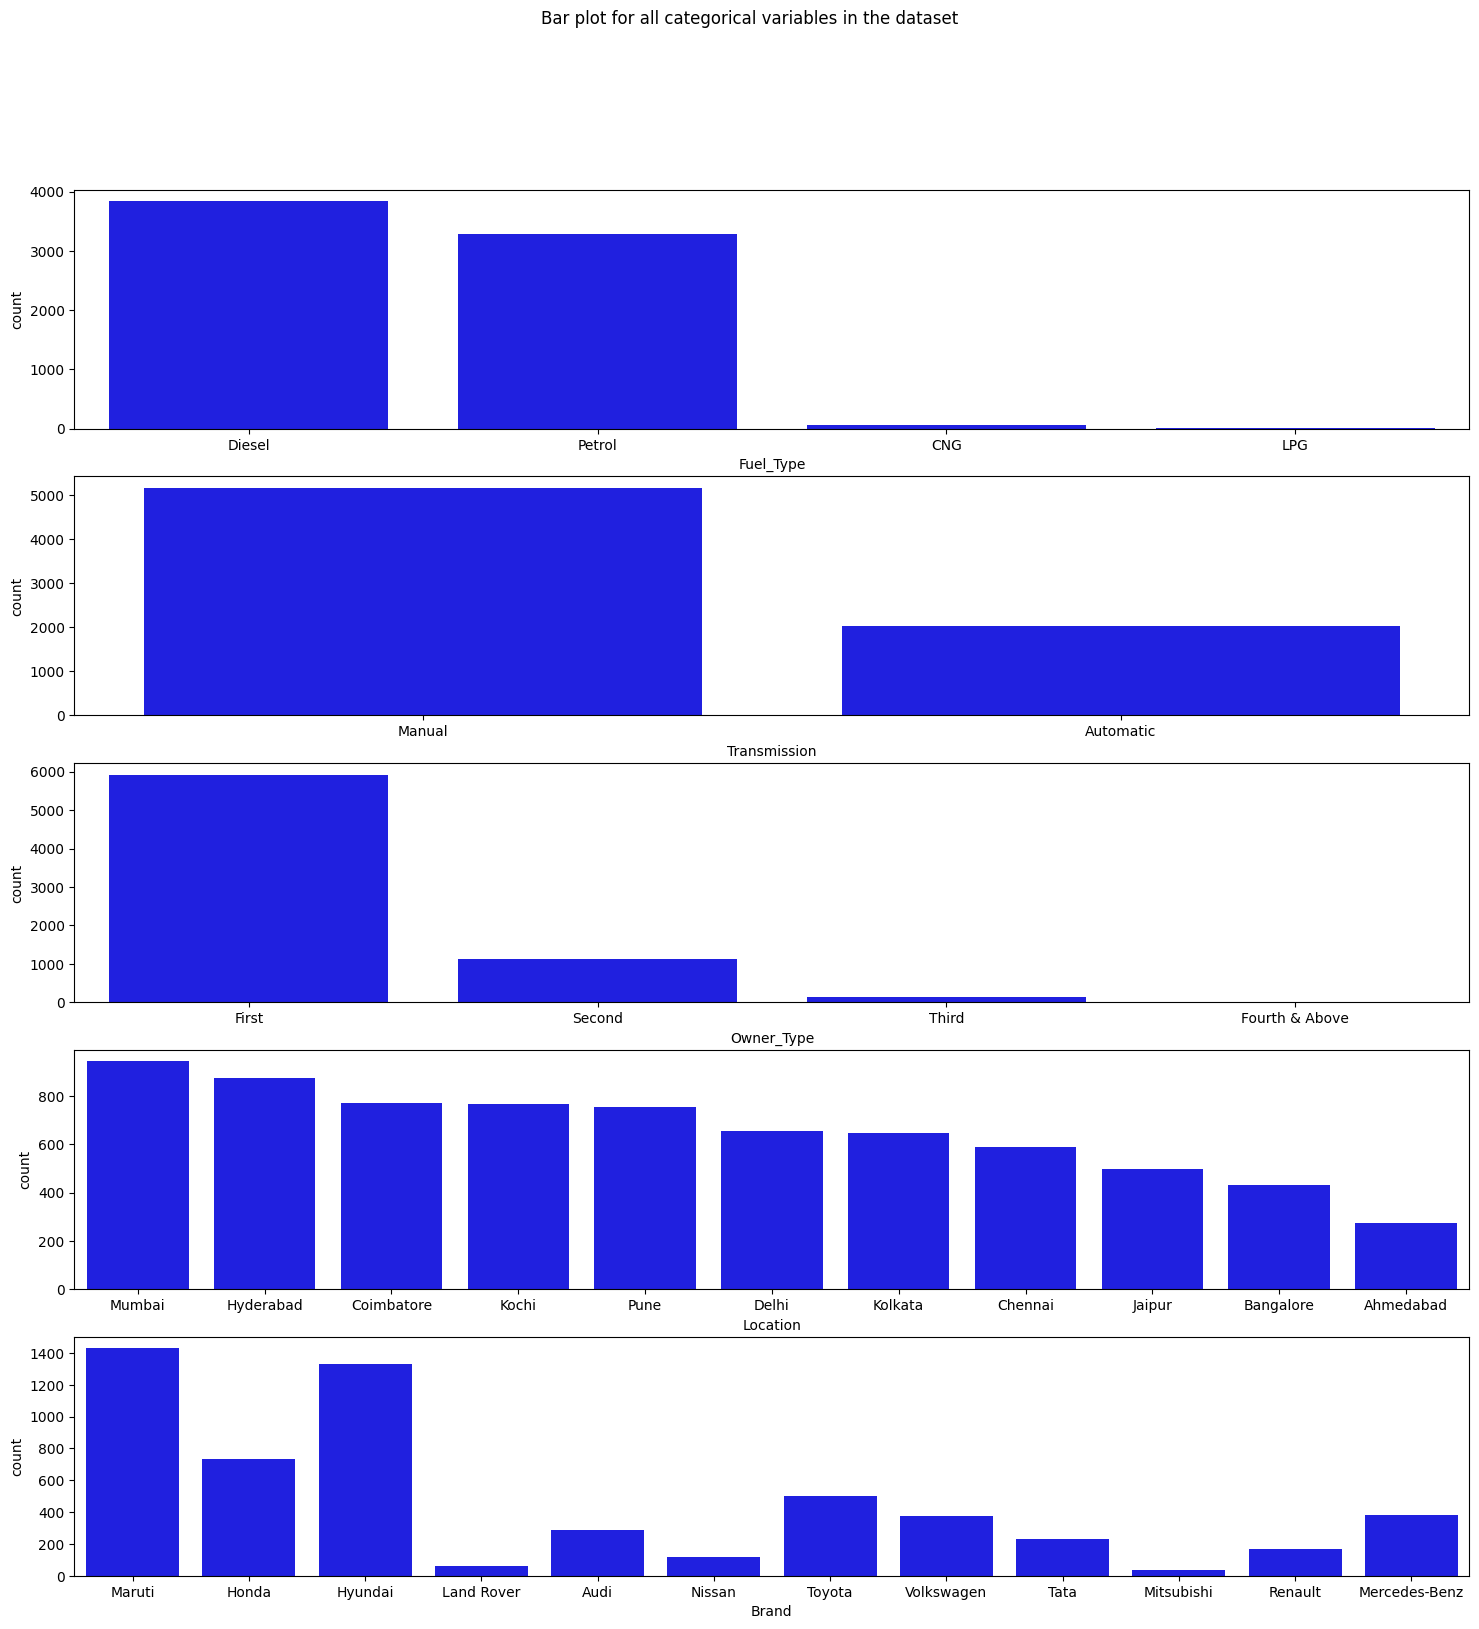

In [125]:
fig, axes = plt.subplots(5, 1, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0], x = 'Fuel_Type', data = data, color = 'blue',
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[1], x = 'Transmission', data = data, color = 'blue',
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[2], x = 'Owner_Type', data = data, color = 'blue',
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[3], x = 'Location', data = data, color = 'blue',
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[4], x = 'Brand', data = data, color = 'blue',
              order = data['Brand'].head(20).value_counts().index);


# Data Transformation

In [129]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [130]:
log_transform(data,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Index: 7205 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               7205 non-null   object 
 1   Year                   7205 non-null   int64  
 2   Kilometers_Driven      7205 non-null   int64  
 3   Fuel_Type              7205 non-null   object 
 4   Transmission           7205 non-null   object 
 5   Owner_Type             7205 non-null   object 
 6   Mileage                7205 non-null   float64
 7   Engine                 7205 non-null   int64  
 8   Power                  7076 non-null   float64
 9   Seats                  7198 non-null   float64
 10  Price                  5981 non-null   float64
 11  Car_Age                7205 non-null   int64  
 12  Brand                  7205 non-null   object 
 13  Kilometers_Driven_log  7205 non-null   float64
 14  Price_log              5981 non-null   float64
dtypes: float6

<Axes: xlabel='Kilometers_Driven_log', ylabel='Density'>

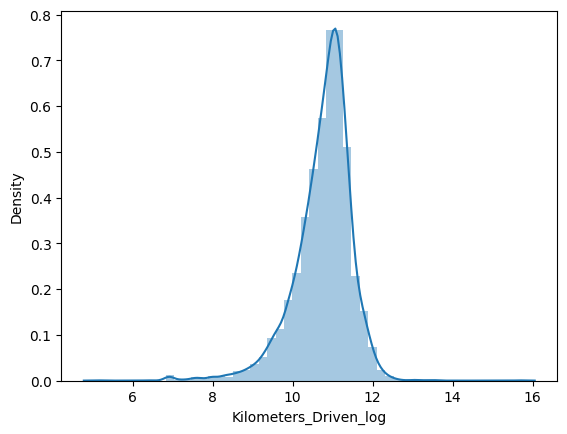

In [131]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log")

# EDA Bivariate Analysis

<Figure size 1300x1700 with 0 Axes>

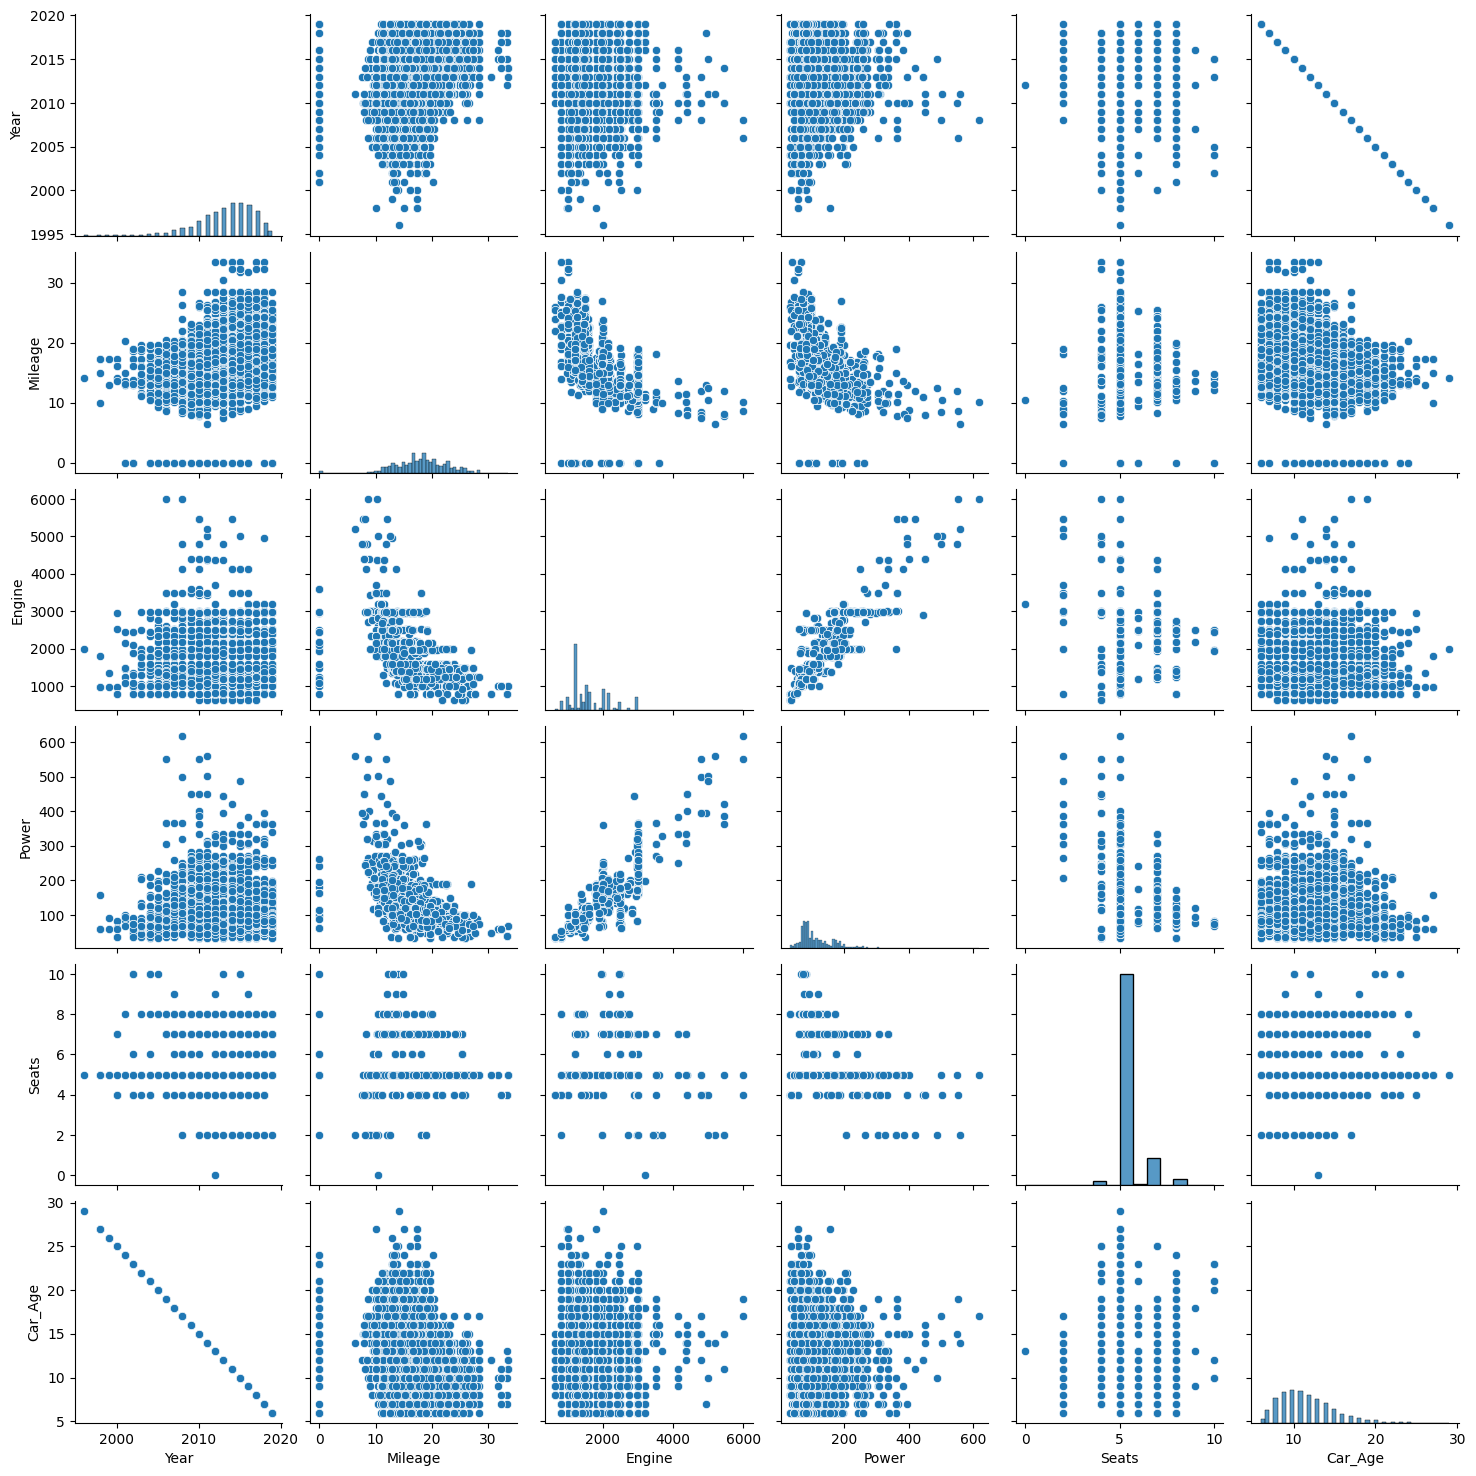

In [126]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

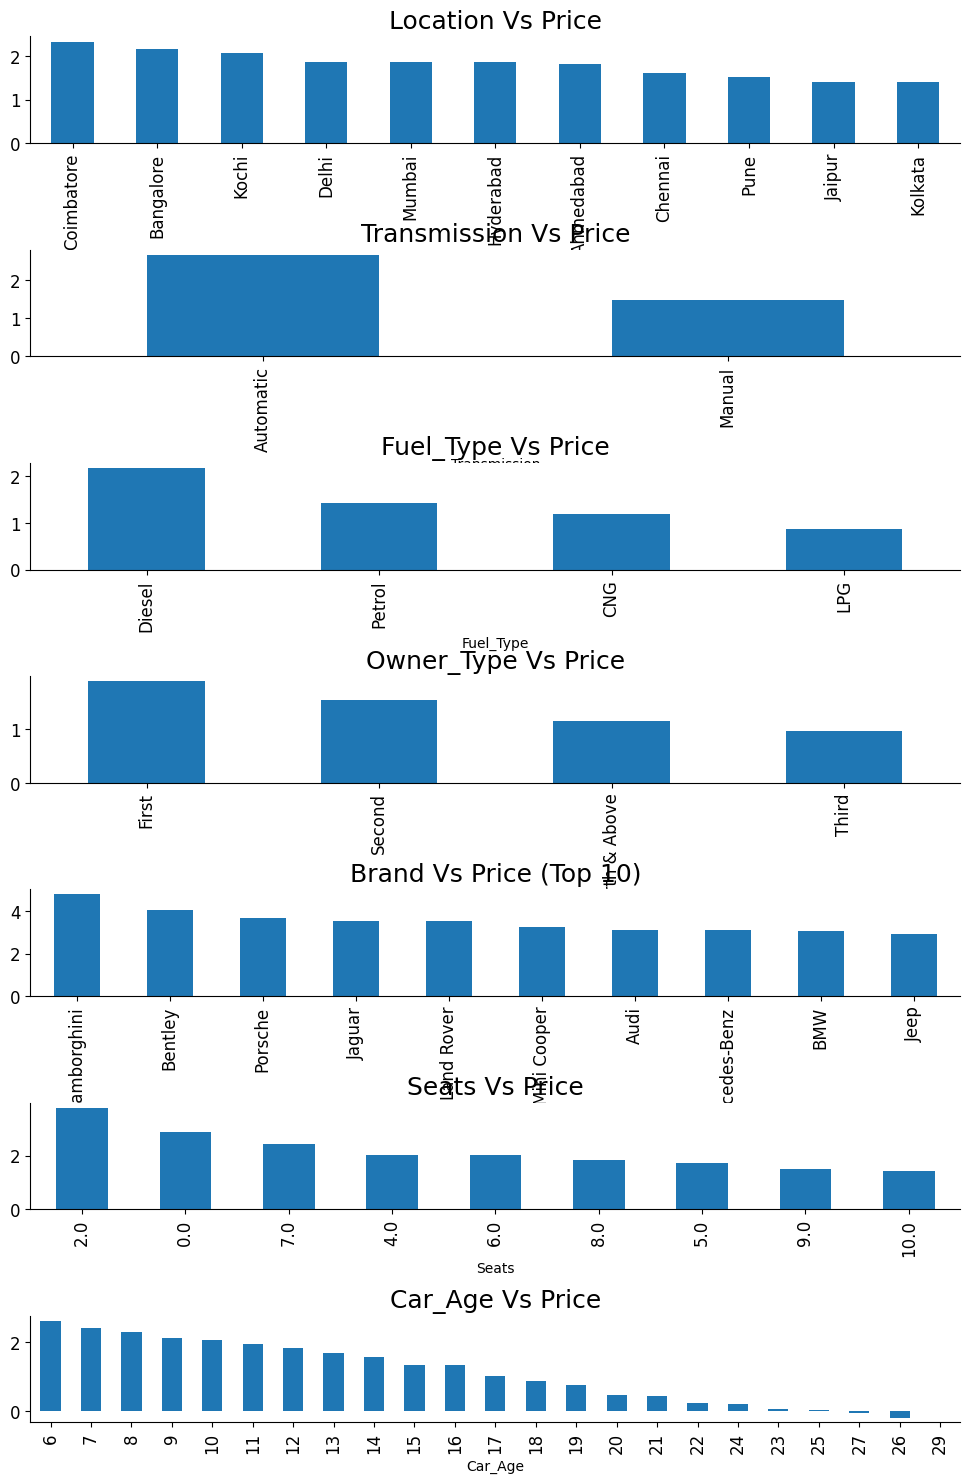

In [135]:
fig, axarr = plt.subplots(7, 1, figsize=(12, 18))

data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0], fontsize=12)
axarr[0].set_title("Location Vs Price", fontsize=18)

data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1], fontsize=12)
axarr[1].set_title("Transmission Vs Price", fontsize=18)

data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2], fontsize=12)
axarr[2].set_title("Fuel_Type Vs Price", fontsize=18)

data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3], fontsize=12)
axarr[3].set_title("Owner_Type Vs Price", fontsize=18)

data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[4], fontsize=12)
axarr[4].set_title("Brand Vs Price (Top 10)", fontsize=18)

data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[5], fontsize=12)
axarr[5].set_title("Seats Vs Price", fontsize=18)

data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[6], fontsize=12)
axarr[6].set_title("Car_Age Vs Price", fontsize=18)

plt.subplots_adjust(hspace=1.0, wspace=0.5)
sns.despine()
plt.show()


# EDA Multivariate Analysis

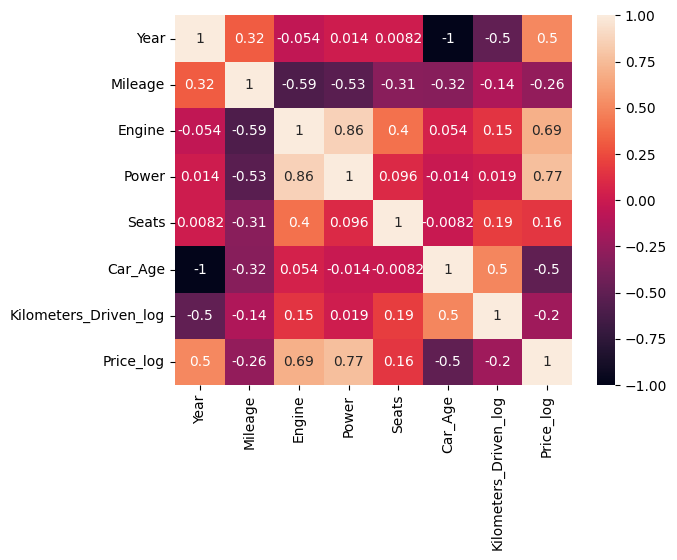

In [136]:
data_numerical=data[num_cols]
data_numerical['Kilometers_Driven_log']=data['Kilometers_Driven_log']
data_numerical['Price_log']=data['Price_log']
sns.heatmap(data_numerical.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()